<br>
<font face="Times New Roman" size="5">
    <div dir="ltr" align="center">
        <font color="black" size="6"><b>Ferdowsi University of Mashhad</b></font><br>
        <font color="black" size="15"><b>Reinforcement Learning Course</b></font><br>
        <font color="black" size="6"><b>10-Armed Bandit Problem Simulation</b></font><br>
        <font color="black" size="5">
            <b>Professor:</b> Prof. Mohammad-Bagher Naghibi-Sistani<br>
            <b>Student Information:</b><br>
            <b>Name</b>: Mustafa Sadeghi<br>
            <b>Student ID</b>: 4027390423<br><br>
        </font>
        <font>
        <font color="black" size="5"><i>Fall 2024</i></font><br><br>
        </font>
    </div>
</font>

---

# Overview and Summary of the Multi-Armed Bandit Problem and the Algorithms Demonstrated

<!-- <img src="Monte-Carlo-Casino3.jpg" alt="Sample Image" style="display: block; margin: 0 auto; width:50%;"> -->

![Sample Image](Monte-Carlo-Casino3.jpg)


## The Multi-Armed Bandit Problem

The multi-armed bandit problem is a classic scenario in reinforcement learning and decision-making under uncertainty. Imagine having several slot machines (each called a "bandit") in front of you. Each machine, when played, yields a reward drawn from a probability distribution unique to that machine. The distributions are unknown to you. Your goal is to maximize your total reward by choosing which machine to play repeatedly over time.

Key challenges:
- **Exploration vs. Exploitation:**  
  You need to explore different machines to gather information about their reward distributions. However, you also need to exploit the best machine found so far. Too little exploration may cause you to miss the truly optimal machine, while too much exploration wastes time playing suboptimal machines.

## Mathematical Formulation

1. **Setting:**
   - You have $k$ bandits. In this example, $k = 10$.
   - Each bandit $Q(i)$ has an associated true mean reward $Q^*(i)$. In the code, these are drawn from a normal distribution:
     
     $Q^*(i) \sim N(0,1)$.

2. **Learning the Value Estimates:**

   Initially, the mean rewards $Q^*(i)$ are unknown. We maintain an estimate $Q(i)$ for each bandit. When an action (bandit) $a$ is selected at time step $t$, it yields a reward $R(t)$ drawn from $N(Q^*(a), 1)$.

   The estimate $Q(a)$ is updated incrementally using:

   
   $$
   Q(a) \leftarrow Q(a) + \frac{R(t) - Q(a)}{N(a)}
   $$

   
   where $N(a)$ is the number of times action $a$ has been selected so far. This update rule ensures that $Q(a)$ approaches the true mean $Q^*(a)$ as more data is collected.


![Sample Image](bandit.png)


3. **Optimal Action:**
   The optimal action at any step is the one with the highest true mean $Q^*(i)$. Over time, a good strategy should converge to selecting that optimal action a large percentage of the time.

## Algorithms Demonstrated

### 1. Greedy Algorithm
- **Description:**  
  Always select the bandit with the current highest estimated mean reward $Q(i)$.

  
- **Formula for Action Selection:**

  
  $$
  A(t) = \arg\max_i Q(i)
  $$
  
- **Shortcoming:**  
  If the agent gets unlucky and initially estimates a suboptimal bandit to be the best (due to random chance), it never explores other options. As a result, it may fail to find the true optimal machine.

### 2. Epsilon-Greedy Algorithm
- **Description:**  
  With probability $\epsilon$, select a random bandit (exploration); with probability $1 - \epsilon$, select the best-estimated bandit (exploitation).
  
- **Formula for Action Selection:**

  
  $$
  A(t) = 
    \begin{cases}
      \text{a random action with probability } \epsilon, \\
      \arg\max_i Q(i) \text{ with probability } 1 - \epsilon.
    \end{cases}
  $$

- **Impact of Different $\epsilon$ Values:**

  
  - $\epsilon = 0.1$: More exploration. This ensures the agent frequently tries different bandits, rapidly discovering the best one. Typically leads to higher long-term reward and a higher probability of selecting the optimal action.

 
  - $\epsilon = 0.01$: Less exploration. The agent still improves over purely greedy by occasionally exploring, but may converge slower and achieve a lower optimal action percentage compared to higher exploration.

## Observed Results and Interpretation

- **No Exploration (Greedy):**  
  The agent quickly settles on a potentially suboptimal bandit, resulting in lower long-term average rewards and fewer optimal selections.

- **Some Exploration (Epsilon-Greedy):**  
  Introducing even a small amount of exploration ($\epsilon=0.01$) helps the agent discover better bandits over time, boosting performance above greedy.

- **More Exploration ($\epsilon=0.1$):**  
  Encourages broader search, which often leads to identifying the truly optimal bandit. This approach yields the highest average reward and the largest percentage of optimal actions in the long run.

## Takeaways

1. **Exploration is Crucial:**  
   Pure exploitation can get stuck in suboptimal policies. A balanced exploration strategy ensures the agent gathers enough information to identify the best bandit.

2. **Choosing $\epsilon$:**  
   The value of $\epsilon$ affects the trade-off between exploration and exploitation. A higher $\epsilon$ increases the chance of finding the optimal bandit but also includes more "wasted" plays on poor bandits. A well-chosen $\epsilon$ leads to better overall performance.

3. **Incremental Value Update:**  
   The incremental update formula allows the agent to efficiently maintain running estimates of each bandit’s mean without storing all past rewards.

In summary, the multi-armed bandit problem exemplifies a fundamental exploration-exploitation dilemma. The algorithms and formulas used in the code demonstrate how introducing even a small probability of random exploration can significantly improve an agent’s long-term performance compared to a purely greedy strategy.



# 10-Armed Bandit Problem Simulation

<!-- <img src="normal_distrbution.png" alt="Sample Image" style="display: block; margin: 0 auto; width:70%;"> -->

![Sample Image](normal_distrbution.png)


In this simulation, we will explore the 10-armed bandit problem, a classic scenario in reinforcement learning. We have 10 slot machines (bandits), each with an unknown probability distribution of rewards. The goal is to identify the machine that yields the highest average reward and learn to maximize the total reward over multiple trials.

The process is as follows:

1. **Part 1: Setting Up the Environment**
   - Generate the true reward means (`Q*`) for 10 bandits.
   - Generate 1000 rewards for each of these 10 bandits from normal distributions with the respective means and a standard deviation of 1.
   - Compute the empirical means (`Qtemp`) of these generated rewards.
   - Visualize the difference between `Q*` and `Qtemp`.

2. **Part 2: Simulation with Learning Agents**
   - We introduce three agents:
     - **Greedy Agent:** Always exploits the current best estimate.
     - **Epsilon-Greedy Agent (E = 0.1):** Explores (picks randomly) with probability 0.1, otherwise exploits.
     - **Epsilon-Greedy Agent (E = 0.01):** Explores with probability 0.01, otherwise exploits.
   - We run 2000 experiments, each with a fresh environment. Each experiment lasts for 1000 steps.
   - We record the average reward and the percentage of selecting the optimal machine across time for each agent.
   - Finally, we visualize the results to compare these agents’ performance.


## Part 1: Setting Up the Environment

In this part, we:
- Create `Qstar`: a vector of length 10, with each element drawn from a normal distribution N(0,1).
- For each bandit, generate 1000 rewards from N(Qstar[i],1).
- Compute `Qtemp`: the sample mean of these generated rewards.
- Plot the difference between `Qstar` and `Qtemp`.

**Theoretical Note:**
- `Qstar` represents the true (but unknown) mean reward for each bandit.
- Given 1000 samples for each bandit, `Qtemp` should be close to `Qstar`, as the sample mean approximates the true mean when sample size is large.
- Plotting `Qstar - Qtemp` helps us see how well our finite sample means approximate the true values.


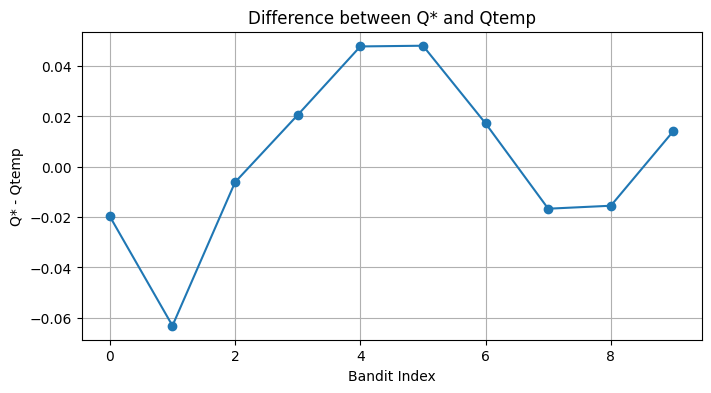

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  

# Step 1: Generate Qstar
Qstar = np.random.normal(loc=0.0, scale=1.0, size=10)

# Step 2: Generate the rewards A (10x1000)
A = np.zeros((10, 1000))
for i in range(10):
    A[i, :] = np.random.normal(loc=Qstar[i], scale=1.0, size=1000)

# Step 3: Compute Qtemp
Qtemp = A.mean(axis=1)

# Step 4: Plot the difference Qstar - Qtemp
plt.figure(figsize=(8,4))
plt.plot(Qstar - Qtemp, marker='o')
plt.title('Difference between Q* and Qtemp')
plt.xlabel('Bandit Index')
plt.ylabel('Q* - Qtemp')
plt.grid(True)
plt.show()


**Interpretation of the Plot:**
- The plotted differences should hover around zero, because with 1000 samples per bandit, `Qtemp` is likely close to `Qstar`.
- Small deviations occur due to the randomness in sampling.

As expected, since each bandit’s rewards are generated from N(Qstar[i],1), the law of large numbers suggests `Qtemp[i] ≈ Qstar[i]`.


## Part 2: Simulation with Learning Agents

### Idea:
We will simulate the interaction of different agents with the 10-armed bandit environment:

1. **Environment Reset Per Experiment:**
   Each experiment creates a new set of 10 bandits with their own `Qstar` and rewards matrix `A`.
   
2. **Agents:**
   - **Greedy Agent:** Chooses the bandit with the current highest estimated value.  
     - Problem: May get stuck with a suboptimal choice if it happens to sample poorly at the start.
     
   - **Epsilon-Greedy (E=0.1):** 90% exploit the best-known bandit, 10% pick randomly.
     - More exploration helps find the optimal bandit, improving long-term performance.
   
   - **Epsilon-Greedy (E=0.01):** 99% exploit, 1% explore.
     - Less exploration, but still better than never exploring.
   
3. **Experiment Details:**
   - We run 2000 independent experiments. Each experiment:
     - Creates a new environment with fresh `Qstar` and `A`.
     - Runs the agent for 1000 steps.
   - We record two metrics:
     - **Average Reward:** The mean reward at each step across all experiments.
     - **Optimal Action %:** The percentage of times the agent picks the optimal bandit.

**Theoretical Expectation:**
- The greedy agent might learn slowly or get stuck, resulting in lower long-term optimal selection.
- The epsilon-greedy agents, especially with E=0.1, should do better at finding the best bandit, leading to higher average rewards and more frequent optimal action selection over time.


In [2]:
def create_environment():
    Qstar_new = np.random.normal(0.0, 1.0, size=10)
    A_new = np.zeros((10, 1000))
    for i in range(10):
        A_new[i, :] = np.random.normal(loc=Qstar_new[i], scale=1.0, size=1000)
    return Qstar_new, A_new

def run_experiment(Qstar_env, A_env, epsilon, steps=1000):
    # Initialize estimates and counts
    Q_est = np.zeros(10)
    N = np.zeros(10)

    rewards = np.zeros(steps)
    optimal_selection = np.zeros(steps, dtype=int)
    optimal_bandit = np.argmax(Qstar_env) # Agent doesn't no anything about this

    for t in range(steps):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.randint(0, 10)
        else:
            action = np.argmax(Q_est)

        # Check if chosen action is optimal
        if action == optimal_bandit:
            optimal_selection[t] = 1

        # Get reward and update estimates
        reward = A_env[action, t]
        rewards[t] = reward

        N[action] += 1
        Q_est[action] += (reward - Q_est[action]) / N[action]

    return rewards, optimal_selection

# Wrapper functions for each agent type
def run_greedy(Qstar_env, A_env):
    return run_experiment(Qstar_env, A_env, epsilon=0.0)

def run_eps_greedy_0_1(Qstar_env, A_env):
    return run_experiment(Qstar_env, A_env, epsilon=0.1)

def run_eps_greedy_0_01(Qstar_env, A_env):
    return run_experiment(Qstar_env, A_env, epsilon=0.01)


### Running the Experiments

We will:
- Run 2000 experiments for each agent type.
- Each experiment: 
  - Creates a new `Qstar` and `A`.
  - Runs the agent for 1000 steps.
- Store the rewards and optimal action selections from all experiments.

**Expected Outcome:**
- After aggregation, we’ll see how each agent performs on average.


In [3]:
num_experiments = 2000
steps = 1000

# Storage arrays
greedy_rewards_all = np.zeros((num_experiments, steps))
greedy_optimal_all = np.zeros((num_experiments, steps))

eps01_rewards_all = np.zeros((num_experiments, steps))
eps01_optimal_all = np.zeros((num_experiments, steps))

eps001_rewards_all = np.zeros((num_experiments, steps))
eps001_optimal_all = np.zeros((num_experiments, steps))

for i in range(num_experiments):
    Qs, A_env = create_environment()
    # Greedy
    r, o = run_greedy(Qs, A_env)
    greedy_rewards_all[i, :] = r
    greedy_optimal_all[i, :] = o

    # Eps=0.1
    r, o = run_eps_greedy_0_1(Qs, A_env)
    eps01_rewards_all[i, :] = r
    eps01_optimal_all[i, :] = o

    # Eps=0.01
    r, o = run_eps_greedy_0_01(Qs, A_env)
    eps001_rewards_all[i, :] = r
    eps001_optimal_all[i, :] = o

# Compute average metrics across all experiments
greedy_mean_rewards = greedy_rewards_all.mean(axis=0)
greedy_optimal_rate = greedy_optimal_all.mean(axis=0) * 100.0

eps01_mean_rewards = eps01_rewards_all.mean(axis=0)
eps01_optimal_rate = eps01_optimal_all.mean(axis=0) * 100.0

eps001_mean_rewards = eps001_rewards_all.mean(axis=0)
eps001_optimal_rate = eps001_optimal_all.mean(axis=0) * 100.0


### Visualization

We now plot:
1. The average reward over the 1000 steps for each agent.
2. The percentage of times each agent selected the optimal bandit.

**Interpretation:**
- Higher average reward: The agent is performing better.
- Higher optimal action %: The agent more frequently identifies and selects the best bandit.

We anticipate:
- The greedy agent may settle too early, resulting in lower long-term performance.
- The epsilon-greedy agents, especially E=0.1, will improve over time and likely achieve better long-term performance.


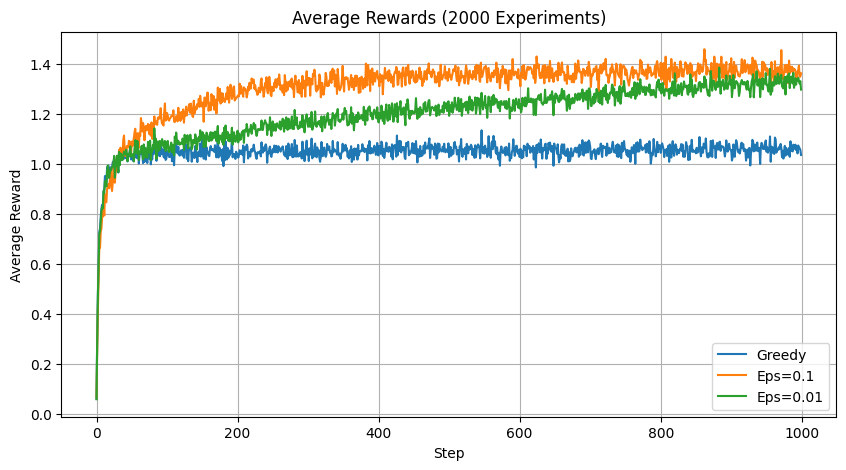

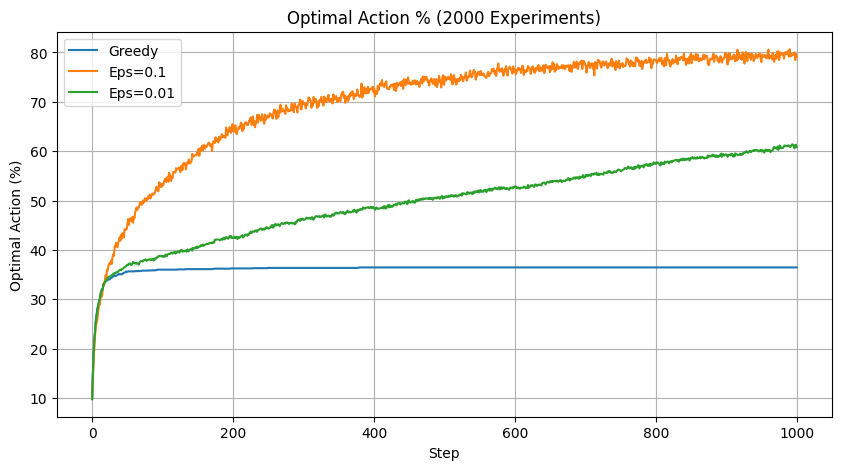

In [4]:
# Plot average rewards
plt.figure(figsize=(10,5))
plt.plot(greedy_mean_rewards, label='Greedy')
plt.plot(eps01_mean_rewards, label='Eps=0.1')
plt.plot(eps001_mean_rewards, label='Eps=0.01')
plt.title('Average Rewards (2000 Experiments)')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.grid(True)
plt.legend()
plt.show()

# Plot optimal action percentage
plt.figure(figsize=(10,5))
plt.plot(greedy_optimal_rate, label='Greedy')
plt.plot(eps01_optimal_rate, label='Eps=0.1')
plt.plot(eps001_optimal_rate, label='Eps=0.01')
plt.title('Optimal Action % (2000 Experiments)')
plt.xlabel('Step')
plt.ylabel('Optimal Action (%)')
plt.grid(True)
plt.legend()
plt.show()

## Interpreting the Results

From the generated plots, we see the behavior of the three agents across 2000 experiments and 1000 steps per experiment:

### Optimal Action Percentage Plot

- **Greedy Agent (Blue Line):**  
  The greedy agent consistently hovers around selecting the optimal action roughly 35% of the time. Without exploration, if the greedy agent initially gets a misleadingly high reward from a suboptimal bandit, it will stick to that choice indefinitely. As a result, it fails to improve its action selection in the long run.

- **Epsilon-Greedy (E=0.1, Orange Line):**  
  This agent starts off with a lower optimal action rate, but improves significantly as steps progress. By exploring 10% of the time, it gathers enough information to correctly identify and exploit the optimal bandit. Over time, it stabilizes at selecting the optimal action around 80% of the time, far outpacing the greedy agent.

- **Epsilon-Greedy (E=0.01, Green Line):**  
  This agent lies between the other two. It explores, but less frequently (1% of the time). Consequently, it improves over the greedy agent by steadily increasing its optimal selection rate, but not as dramatically or as quickly as the E=0.1 agent. Over 1000 steps, it reaches around 60% optimal action selection, demonstrating that some exploration is better than none, but not as effective as more frequent exploration in this scenario.

### Average Rewards Plot

- **Greedy Agent (Blue Line):**  
  The greedy agent’s average reward increases initially but quickly plateaus at around 1.0 on average. Without exploration, it doesn’t find the truly optimal bandit if its early guesses are poor.

- **Epsilon-Greedy (E=0.1, Orange Line):**  
  With more exploration, the E=0.1 agent finds the best bandit more often. Over time, it achieves the highest average rewards, stabilizing around 1.4. The consistent exploration ensures it doesn’t get stuck on suboptimal choices.

- **Epsilon-Greedy (E=0.01, Green Line):**  
  This agent also outperforms the greedy agent, stabilizing at about 1.2. With less frequent exploration than the E=0.1 agent, it takes longer to find the optimal bandit and does not perform as well in the long run. Still, it proves better than never exploring at all.

### Overall Lessons

- **No Exploration (Greedy):**  
  Leads to suboptimal long-term performance. The agent gets stuck due to limited initial information.
  
- **Some Exploration (E=0.01):**  
  Improves results, but the agent still struggles to quickly and consistently find the best bandit due to insufficient exploration.
  
- **More Exploration (E=0.1):**  
  Balances exploration and exploitation effectively, enabling the agent to identify and select the optimal bandit frequently, thus achieving higher rewards and better long-term outcomes.

In essence, carefully chosen exploration rates help the agent reliably converge to near-optimal decisions and maximize cumulative reward. The 0.1 epsilon rate performs best in this setup, demonstrating the value of a greater commitment to exploration.


## References

1. **Reinforcement Learning Course**  
   Offered at Ferdowsi University of Mashhad by [Prof. Mohammad-Bagher Naghibi-Sistani](https://g.co/kgs/sKNdmsZ).

2. **Multi-Armed Bandit Problem and Epsilon-Greedy Action-Value Method in Python**  
   [YouTube Video](https://youtu.be/ElgM5s28oVc?si=8W3GcNVvNau0wcvn)

3. **Artificial Intelligence: Reinforcement Learning in Python**  
   [Udemy Course](https://www.udemy.com/share/1013km3@QNKX-neNLmdbeFl2aU1-dAZlAUP4dU3Ml8_6YcyWlyvo5OwEotgk7yrflcN-Ypgkxg==/)

4. **Reinforcement Learning Course**  
   [Hamrah Academy](https://hamrah.academy/course/3220)

5. **Reinforcement Learning Specialization**  
   [Coursera Course by the University of Alberta](https://www.coursera.org/specializations/reinforcement-learning)
